In [1]:
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display, Markdown

In [2]:
# Adapted slightly from code written by @ERushe
vid_dir = "../ISL-master/Videos/"

colour_dir = "../ISL-master/Frames-colour/"

for person_id in range(1, 7): 
    person_dir = "Person{}".format(person_id)
    videos = sorted(glob.glob(os.path.join(*[vid_dir, person_dir, "*.mov"])))
    person_colour_frame_dir = os.path.join(colour_dir, person_dir)
    
    if not os.path.exists(person_colour_frame_dir): os.makedirs(person_colour_frame_dir)
    
    for video in videos: 
        #Video name format is "a (1).mov"
        video_name = os.path.split(video)[1]
        
        # Get the name of the file: a (1)
        video_split = os.path.splitext(video_name)[0]
        
        # Letter is the first character of the filename
        letter = video_split[0].upper()
        
        # Trial number is the fourth character of the filename (i.e. index 3)
        letter_take = video_split[3]
        
        # Open the video stream
        cap = cv2.VideoCapture(video)
        
        # Get the number of frames in the video. 
        num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        # Raise exception if no frames are returned. 
        if num_frames == 0:
            raise ValueError("Error in reading video.")
            
        # write all video frames in the same format as the "Frames" 
        # directory from https://github.com/YAYAYru/sign-lanuage-datasets
        for i, frame in enumerate(range(num_frames)):
            ret, frame = cap.read()
            # Put into this format: Person1-A-1-1.jpg
            frame_filename = '-'.join([person_dir, letter, letter_take, str(i+1)])+".jpg"
            cv2.imwrite(os.path.join(person_colour_frame_dir, frame_filename), frame) 

        cap.release()
        cv2.destroyAllWindows()

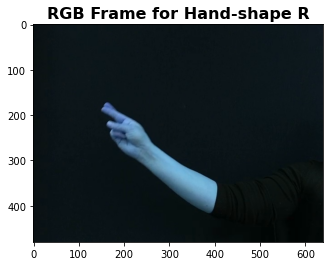

In [23]:
# Example of the extracted frames
img = cv2.imread('../ISL-master/Frames-colour/Person4-R-1-75.jpg')
plt.title("RGB Frame for Hand-shape R", fontweight='bold', fontsize=16)
plt.imshow(img)

In [3]:
colour_dir = "../ISL-master/Frames-colour/"

files = sorted(glob.glob(os.path.join(colour_dir, "Person*")))
labels = [file_name.split('-')[-3] for file_name in files]

In [4]:
print("Example of train_files: {}".format(files[-1]))
print("Example of associated label: {}".format(labels[-1]))

print("\nNumber of files: {}".format(len(files)))

Example of train_files: ../ISL-master/Frames-colour/Person6-Z-3-97.jpg
Example of associated label: Z

Number of files: 57971


In [8]:
# Getting counts of frames per hand-shape: 
props = Counter(labels)
print(props)

Counter({'E': 2442, 'Q': 2426, 'T': 2422, 'W': 2417, 'G': 2373, 'P': 2358, 'H': 2349, 'D': 2347, 'U': 2340, 'B': 2325, 'V': 2312, 'C': 2278, 'I': 2273, 'L': 2273, 'R': 2249, 'S': 2246, 'F': 2231, 'Y': 2231, 'K': 2203, 'M': 2168, 'O': 2126, 'A': 2107, 'J': 2055, 'N': 2049, 'Z': 1928, 'X': 1443})


In [9]:
# Separating into two separate dicts for static and dynamic shapes: 
static_keys = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','Y']
dynamic_keys = ['J', 'X', 'Z']

[static_keys, dynamic_keys] = map(lambda keys: {x: props[x] for x in keys}, [static_keys, dynamic_keys])

In [19]:
print("Static Hand-shape Dictionary: ", static_keys)
print("\nTotal static handshape RGB frames: {}".format(sum(static_keys.values())))
print("\nAverage frames per shape: {}".format(round(sum(static_keys.values())/23)))

Static Hand-shape Dictionary:  {'A': 2107, 'B': 2325, 'C': 2278, 'D': 2347, 'E': 2442, 'F': 2231, 'G': 2373, 'H': 2349, 'I': 2273, 'K': 2203, 'L': 2273, 'M': 2168, 'N': 2049, 'O': 2126, 'P': 2358, 'Q': 2426, 'R': 2249, 'S': 2246, 'T': 2422, 'U': 2340, 'V': 2312, 'W': 2417, 'Y': 2231}

Total static handshape RGB frames: 52545

Average frames per shape: 2285


Average frames per static shape (grey-scale frames) according to [data source](https://github.com/marlondcu/ISL): 2291

In [16]:
print("Dynamic Hand-shape Dictionary: ", dynamic_keys)
print("\nTotal dynamic handshape RGB frames: {}".format(sum(dynamic_keys.values())))
print("\nAverage frames per shape: {}".format(round(sum(dynamic_keys.values())/3)))

Dynamic Hand-shape Dictionary:  {'J': 2055, 'X': 1443, 'Z': 1928}

Total dynamic handshape RGB frames: 5426

Average frames per shape: 1809


Average frames per dynamic shape (grey-scale frames) according to [data source](https://github.com/marlondcu/ISL): 1809

In [42]:
# File counts taken directly from server
signers_gs = {'Person1': 8864, 'Person2': 9971, 'Person3': 9320, 'Person4': 9551, 'Person5': 11478, 'Person6': 8930}
signers_rgb = {'Person1': 8864, 'Person2': 9828, 'Person3': 9320, 'Person4': 9551, 'Person5': 11478, 'Person6': 8930}

classes = list(signers_rgb.keys())
grey_dist = signers_gs.values()
rgb_dist = signers_rgb.values()

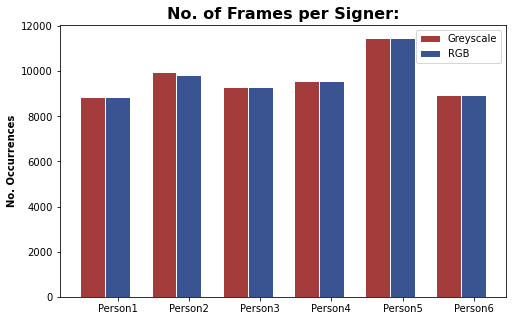

In [43]:
# Visualization
bar_w = 0.35

f, ax = plt.subplots(figsize=(8,5))

r1 = np.arange(len(grey_dist))
r2 = [x + bar_w for x in r1]

# Make the plot
plt.bar(r1, grey_dist, color='#a33c3a', width=bar_w, edgecolor='white', label='Greyscale')
plt.bar(r2, rgb_dist, color='#3a5491', width=bar_w, edgecolor='white', label='RGB')

plt.xticks([r + bar_w for r in range(len(grey_dist))], classes)

plt.legend(['Greyscale', 'RGB'])

plt.title('No. of Frames per Signer:', fontweight='bold', fontsize=16)
plt.ylabel('No. Occurrences', fontweight='bold')
plt.show()

The above conversion from video to rgb frames has yielded slightly fewer frames for Person 2. This is seemingly due to a small number of the original videos being very slightly longer than those provided in the public data.